# ALEX JAEGER
## K-State Honor Code:
"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

## 1. Business Problem

This project is a follow-up for a previous project based upon finding correlations for predicting movie success. Rather than providing hypotheses based on cleaned data, this project will instead focus on machine learning to predict a movie's success.

## 2. Regression

- Build regression models using different regression algorithms. The Y value is imdb_score. It is important you use important features in your models.
- Evaluate the models
- (Optional for extra points) Scrape some new data (scoring dataset) from the website and deploy your best model and predict imdb_score for the movies in the scoring dataset).

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats

import plotly.graph_objects as go
import plotly.express as px

import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv("data/movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
df.corr()["imdb_score"]

num_critic_for_reviews       0.305303
duration                     0.261662
director_facebook_likes      0.170802
actor_3_facebook_likes       0.052633
actor_1_facebook_likes       0.076099
gross                        0.198021
num_voted_users              0.410965
cast_total_facebook_likes    0.085787
facenumber_in_poster        -0.062958
num_user_for_reviews         0.292475
budget                       0.030688
title_year                  -0.209167
actor_2_facebook_likes       0.083808
imdb_score                   1.000000
aspect_ratio                 0.059445
movie_facebook_likes         0.247049
Name: imdb_score, dtype: float64

Based on an initial ".corr()" analysis,  number of critics for reviews and number of voted users have high positive correlation with IMDb score.  Number of users for reviews and movie duration do have some correlation, but less so than the first two. These would likely be the main forcus as to how well a movie performs.

In [4]:
df = df[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'gross', 'budget', 'num_voted_users', 'num_user_for_reviews', 'title_year', 'imdb_score', 'movie_facebook_likes']]
df.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,gross,budget,num_voted_users,num_user_for_reviews,title_year,imdb_score,movie_facebook_likes
0,723.0,178.0,0.0,760505847.0,237000000.0,886204,3054.0,2009.0,7.9,33000
1,302.0,169.0,563.0,309404152.0,300000000.0,471220,1238.0,2007.0,7.1,0


Only the most relevant integer-based columns are being used for this analysis. This assertion is made based off of the previous project involving this dataset, where the relevant columns were determined to be those fitting with correlations.

In [5]:
df = df.dropna()
df.isnull().sum()

num_critic_for_reviews     0
duration                   0
director_facebook_likes    0
gross                      0
budget                     0
num_voted_users            0
num_user_for_reviews       0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [6]:
y = df['imdb_score'] 
X = df[['num_critic_for_reviews', 'duration']]

model2 = lm.LinearRegression()
model2.fit(X, y)   
model2_y = model2.predict(X)

In [7]:
coef = ["%.3f" % i for i in model2.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_critic_for_reviews', '0.002'), ('duration', '0.014')]

In [8]:
print("mean square error: ", mean_squared_error(y, model2_y))
print("variance or r-squared: ", explained_variance_score(y, model2_y))

mean square error:  0.8954182156616775
variance or r-squared:  0.19687816474234665


Despite being two of the best correlating factors for successful movies, the r-squared of this regression suggests that this is far from a good determinant for predicting a successful movie.

In [9]:
y = df['imdb_score'] 
X = df.drop(['imdb_score'], axis =1)

model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)

print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  0.7421907043013579
variance or r-squared:  0.3343115539488931


On the other hand, if we were to use all variables within the dataset, we would have a more significant chance of determining such.

## 3. Classification
- The goal is to build a classification model to predict if a movie is good or bad. You need to create a new “categorical” column from imdb_score in order to build classification models. Create the column by “binning” the imdb_score into 4 categories (or buckets): “less than 4, 4~6, 6~8 and 8~10, which represents bad, OK, good and excellent respectively”1.
- It is important that you use different classification algorithms we have learned and evaluate model quality.
- (Optional for extra points) Deploy your best classification model and predict if each movie (in the scoring dataset) is bad, OK, good or excellent.

In [10]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import GridSearchCV

In [11]:
df1 = df
df1["imdb_score"] = df1["imdb_score"] * 10

df1.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,gross,budget,num_voted_users,num_user_for_reviews,title_year,imdb_score,movie_facebook_likes
0,723.0,178.0,0.0,760505847.0,237000000.0,886204,3054.0,2009.0,79.0,33000
1,302.0,169.0,563.0,309404152.0,300000000.0,471220,1238.0,2007.0,71.0,0


SKLearn requires Integers rather than Floats for its classifiers, so it is necessary to multiply imdb_score by ten to be usable.

In [12]:
df1["imdb_score"] = df1["imdb_score"].astype(int)
df1.head(2)

,num_critic_for_reviews,duration,director_facebook_likes,gross,budget,num_voted_users,num_user_for_reviews,title_year,imdb_score,movie_facebook_likes
0,723.0,178.0,0.0,760505847.0,237000000.0,886204,3054.0,2009.0,79,33000
1,302.0,169.0,563.0,309404152.0,300000000.0,471220,1238.0,2007.0,71,0


In [13]:
y = df1["imdb_score"]
X = df1.drop(["imdb_score"], axis=1)

print(y.shape, X.shape)

(3889,) (3889, 9)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

The accuracy of this model was, unfortunately, not high whatsoever, sitting at a miniscule 8%.

In [15]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))

0.08826049700085689
--------------------------------------------------------
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
--------------------------------------------------------
              precision    recall  f1-score   support

          16       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         3
          28       0.00      0.00      0.00         2
          29       0.00      0.00      0.00         2
          30       0.00      0.00      0.00         1
          31       1.00      1.00      1.00         1
          32       0.00      0.00      0.00         0
          33       0.20      0.33      0.25

C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.



## 4. Clustering
- Analyze the data using K-means algorithm and Hierarchical clustering algorithm. You determine the optimal K value for K-means. This is exploratory data analysis and you need to report the movie “profiles” based on clustering analysis.

In [16]:
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [17]:
df.var()

num_critic_for_reviews     1.538676e+04
duration                   5.157180e+02
director_facebook_likes    9.110747e+06
gross                      4.873556e+15
budget                     4.948184e+16
num_voted_users            2.272165e+10
num_user_for_reviews       1.665010e+05
title_year                 1.000736e+02
imdb_score                 1.115209e+02
movie_facebook_likes       4.539982e+08
dtype: float64

In [18]:
X = (df - df.mean()) / (df.max() - df.min())
X.head()

,num_critic_for_reviews,duration,director_facebook_likes,gross,budget,num_voted_users,num_user_for_reviews,title_year,imdb_score,movie_facebook_likes
0,0.689316,0.230074,-0.033987,0.932833,0.015700,0.463716,0.538945,0.061667,0.186483,0.068359
1,0.170843,0.199668,-0.009509,0.339673,0.020857,0.218128,0.179981,0.040834,0.082587,-0.026197
2,0.540301,0.128722,-0.033987,0.195913,0.016355,0.102519,0.131750,0.124167,0.043626,0.217356
3,0.800153,0.182776,0.922534,0.522086,0.016764,0.616479,0.469169,0.092917,0.264405,0.443717
5,0.367887,0.074668,-0.013335,0.028898,0.017886,0.064842,0.081147,0.092917,0.017652,0.042571


In [19]:
X.var()

num_critic_for_reviews     0.023336
duration                   0.005886
director_facebook_likes    0.017223
gross                      0.008426
budget                     0.000332
num_voted_users            0.007958
num_user_for_reviews       0.006506
title_year                 0.010859
imdb_score                 0.018809
movie_facebook_likes       0.003727
dtype: float64

In [20]:
k_means = KMeans(init='k-means++', n_clusters=2, random_state=0)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [21]:
k_means.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [22]:
k_means.cluster_centers_

array([[ 0.21772795,  0.04506093,  0.07021919,  0.08062453,  0.00335191,
         0.11083504,  0.08956444,  0.04150812,  0.10435685,  0.06596396],
       [-0.05943866, -0.01230141, -0.01916949, -0.0220101 , -0.00091506,
        -0.03025742, -0.02445065, -0.01133151, -0.02848891, -0.01800784]])

In [23]:
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [24]:
df2 = df.reset_index(drop=True)
df1 = df1.reset_index(drop=True)

df3 = df2.join(df1)
df3.head()

,num_critic_for_reviews,duration,director_facebook_likes,gross,budget,num_voted_users,num_user_for_reviews,title_year,imdb_score,movie_facebook_likes,cluster
0,723.0,178.0,0.0,760505847.0,237000000.0,886204,3054.0,2009.0,79,33000,0
1,302.0,169.0,563.0,309404152.0,300000000.0,471220,1238.0,2007.0,71,0,0
2,602.0,148.0,0.0,200074175.0,245000000.0,275868,994.0,2015.0,68,85000,0
3,813.0,164.0,22000.0,448130642.0,250000000.0,1144337,2701.0,2012.0,85,164000,0
4,462.0,132.0,475.0,73058679.0,263700000.0,212204,738.0,2012.0,66,24000,0


In [25]:
df3.groupby(['cluster']).mean()

,num_critic_for_reviews,duration,director_facebook_likes,gross,budget,num_voted_users,num_user_for_reviews,title_year,imdb_score,movie_facebook_likes
cluster,,,,,,,,,,
0,340.070743,123.236211,2396.750600,1.123966e+08,8.616068e+07,289920.580336,780.582734,2007.064748,72.676259,32164.268585
1,115.011457,106.256956,340.810802,3.434241e+07,3.403751e+07,51508.329296,203.780360,2001.992144,62.447136,2858.111948


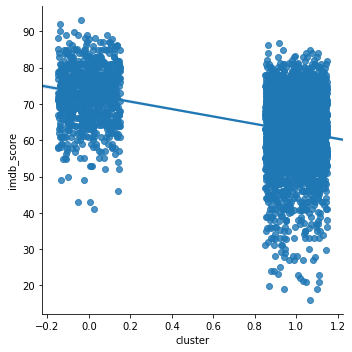

In [26]:
sns.lmplot("cluster", "imdb_score", df3, x_jitter=.15, y_jitter=.15)

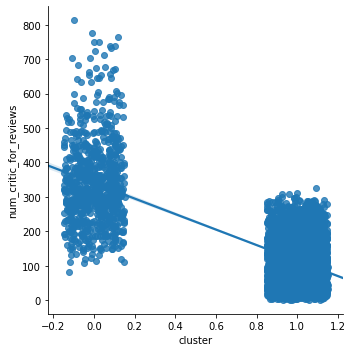

In [27]:
sns.lmplot("cluster", "num_critic_for_reviews", df3, x_jitter=.15, y_jitter=.15)

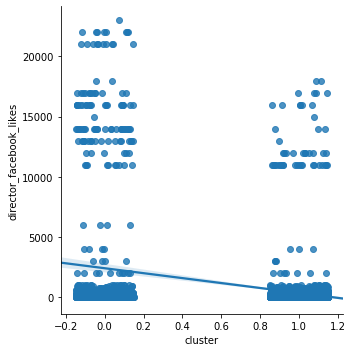

In [28]:
sns.lmplot("cluster", "director_facebook_likes", df3, x_jitter=.15, y_jitter=.15)

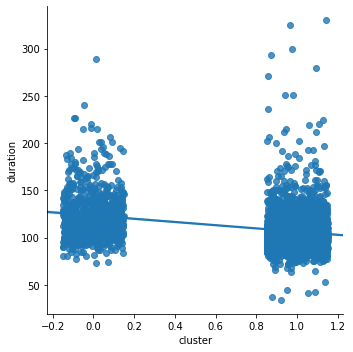

In [29]:
sns.lmplot("cluster", "duration", df3, x_jitter=.15, y_jitter=.15)

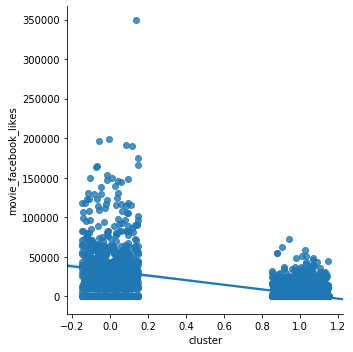

In [30]:
sns.lmplot("cluster", "movie_facebook_likes", df3, x_jitter=.15, y_jitter=.15)

Cluster analysis shows that, for cluster 0 (more highly-rated movies), the number of critics reviewing the movie, the number of people who liked the Facebook page of the movie's director, and the number of people who liked the Facebook page of the movie itself were all related factors for more successful, highly-rated movies.

## 5. Storytelling
- At the end, this is what your client is interested in. Develop useful insights from your models (regression, classification, and clustering). Write a summary using bulleted lists and/or numbers in markdown cells. If this section is “too thin”, your project will receive a low grade.

### Project Overview:

The goal of this project, though simple, is still difficult to answer. Machine learning was used to see if one could determine box office success of a new movie based off of these variables, but sample datasets within this do not yield suitable patterns for such prediction.

### Results:

- Regression analysis had a result of 33% for variance, which is a third of what would be acceptable. This would suggest difficulty in predicting a trend line for movies based off of the given criteria—which is to say that, if a new movie were given similar criteria upon release, this regression line would not be anywhere near accurate enough to determine its rating.
- Classification analysis was far worse. The results yielded a discomforting 8% accuracy.
- Clustering fared much better than the previous two, yielding more readable data. It also confirms much of what was hypothesized within the previous project on this dataset, as its correlating factors are all seen within cluster 0 as opposed to cluster 1.

### Conclusion:

Overall, there are several correlations that assist in making a movie successful, as seen through the previous project's correlation testing and this project's clustering analysis. These variables can be achieved through superior marketing to achieve higher engagement and social presence of the movie prior to release, and such factors *tend* to result in more successful movies.

These factors are good to understand. However, they still cannot guarantee that a movie will be successful, as analysis to determine if a movie's success can be predicted have yielded poor results. Therefore, it is still best to create movies with this knowledge in mind, but while still understanding that one cannot guarantee success.